Ending Bet-It-All: $0.0
Ending Fixed Wager: $11.0
Ending Martingale: $30.9


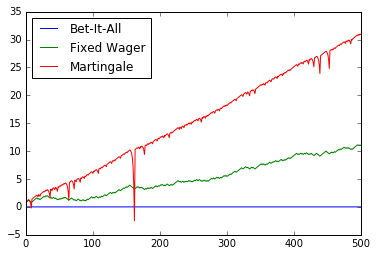

In [1]:
import random
import matplotlib.pyplot as plt
from __future__ import division
from IPython.html.widgets import interactive
from IPython.display import display

def flip(p):
    return 1 if random.random() < p else 0

def calculate_kelly_fraction(b, p):
    q = 1 - p
    return (b*p - q) / b

def plot_charts(charts):
    for k, v in charts.iteritems():
        plt.plot(v, label=k)
    plt.legend(loc='upper left')
    # print balance
    for k, v in charts.iteritems():
        print "Ending %s: $%.1f" % (k, v[-1])

def plot_all(p=0.55, N=500):
    fixed_wager = [1]
    bet_it_all = [1]
    martingale = [1]
    kelly = [1]
    martingale_bet = .1
    martingale_last_bal = 1
    kelly_fraction = calculate_kelly_fraction(1, p)

    for _ in xrange(N):
        win = flip(p)
        change = 1 if win else -1
        fixed_wager.append(fixed_wager[-1] + 0.10 * change)
        bet_it_all.append(bet_it_all[-1] * 2 * win)
        martingale.append(martingale[-1] + martingale_bet * change)
        kelly.append(kelly[-1] + kelly[-1] * kelly_fraction * change)
        # reset Martingale
        martingale_bet = .1 if win else martingale_bet * 2
        martingale_last_bal = martingale[-1] if win else martingale_last_bal

    charts = {'Fixed Wager': fixed_wager, 'Bet-It-All': bet_it_all, 'Martingale': martingale}
    plot_charts(charts)

def plot_kelly(p=.55, N=1000):
    kelly = [1]
    kelly_under = [1]
    kelly_over = [1]
    kelly_fraction = calculate_kelly_fraction(1, p)

    for _ in xrange(N):
        win = flip(p)
        change = 1 if win else -1
        kelly.append(kelly[-1] + kelly[-1] * kelly_fraction * change)
        kelly_under.append(kelly_under[-1] + kelly_under[-1] * kelly_fraction * 0.5 * change)
        kelly_over.append(kelly_over[-1] + kelly_over[-1] * kelly_fraction * 2 * change)
    
    charts = {'Kelly': kelly, 'Kelly Under': kelly_under, 'Kelly Over': kelly_over}
    plot_charts(charts)

v1 = interactive(plot_all, p=(.4,.7,.01), N=(500,3000,100))
display(v1)
# v2 = interactive(plot_kelly, p=(.4,.7,.01), N=(500,3000,100))
# display(v2)